# JINKA UNIVERSITY

COLLEGE OF NATURAL AND COMPUTATIONAL SCIENCE DEPARTEMENT OF COMPUTER SCIENCE

Lab Project Artiffical Intelligence

NAME Yadeta EGAZU  ID 15480

Fayise Arfase ID 13861 

### Title Loan Approval Prediction project using Machine Learning


LOANS Approval prediction are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc.




####### The problem of loan prediction involves predicting whether a loan application should be approved or denied based on various features and historical data. The goal is to build a machine learning model that can accurately assess the creditworthiness of applicants and minimize the risk of default for financial institutions. 

#######This is a classification problem of Loan approval prediction typically involves determining whether a loan application should be approved or denied based on various factors such as applicant information, credit history, income, and loan 

Data 



- Source data from relevant sources.

- Define parameters such as applicant information, credit score, income, loan amount, etc.

- Consult with domain experts if needed.

1	Loan A unique id 

2	Gender	Gender of the applicant Male/female

Importing Libraries and Dataset


Pandas – To load the Dataframe


Matplotlib – To visualize the data features i.e. barplot


Seaborn – To see the correlation between features using heatmap


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Loan Prediction Dataset.csv')


Sourcing: Collect loan application data from financial institutions or lending agencies.
Defining different parameters: Gather information such as applicant's age, income, credit score, loan amount, loan term, employment status, etc.
Talking to experts: Consult with financial analysts or experts in the lending industry to understand the significance of different parameters and their impact on loan approval.



Load Data
Data Exploration (EDA):
- Identify questions to solve, handle different data types, address missing data, analyze correlations, and manipulate features.

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Load Data
Data Exploration (EDA):
- Identify questions to solve, handle different data types, address missing data, analyze correlations, and manipulate features.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are several sources that can be used for loan approval prediction. Here are some popular sources:

  is a platform for data science and machine learning competitions. It hosts a wide range of datasets, including loan datasets that can be used for loan approval prediction. You can find loan datasets with features such as income, credit score, loan amount, employment status, etc., along with the target variable indicating loan approval or denial.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Evaluation:

Define evaluation metric: Accuracy, precision, recall, F1-score, or AUC-ROC depending on the specific requirements of the project.


In [6]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Features:

Create a data dictionary: Document the meaning and characteristics of each feature in the dataset.
Example features: Age, income, credit score, loan amount, loan term, employment status, debt-to-income ratio, previous loan history, etc.


In [7]:
# fill the missing values in the continuous variable columns with its respective mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Preparing the tools:

Import necessary libraries:
Pandas for data analysis
NumPy for numerical operations
Additionally, you may consider using:

Scikit-learn for machine learning models
Matplotlib and Seaborn for data visualization
Jupyter Notebook or Google Colab  and documentation.




In [8]:
df['Gender'].mode()[0]


'Male'

In [9]:
# fill the missing values of columns which have discrete/categorical data with its mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Property_Area'] = df["Property_Area"].fillna(df['Property_Area'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='Gender'>

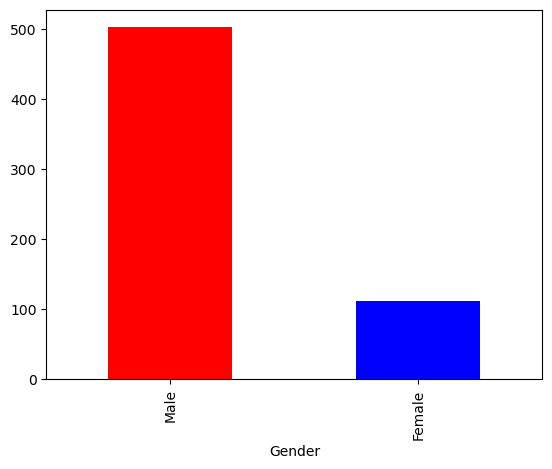

In [11]:
# Male female ratio
df['Gender'].value_counts().plot(kind='bar', color=['r','b'])

Evaluating Your Model:
- For classification: ROC curve, AUC score, confusion matrix, classification report, precision, recall, F1-score.
- For regression: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE).
- Define features and labels, split data into training and test sets, choose models, compare models, tune hyperparameters, and perform cross-validation.



In [13]:
# Ratio of Loan approval/rejections
(df['Loan_Status'])

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

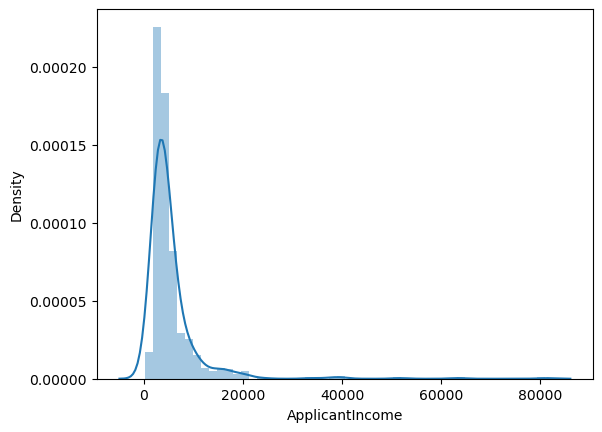

In [15]:
# distrubution of salary of applicants
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

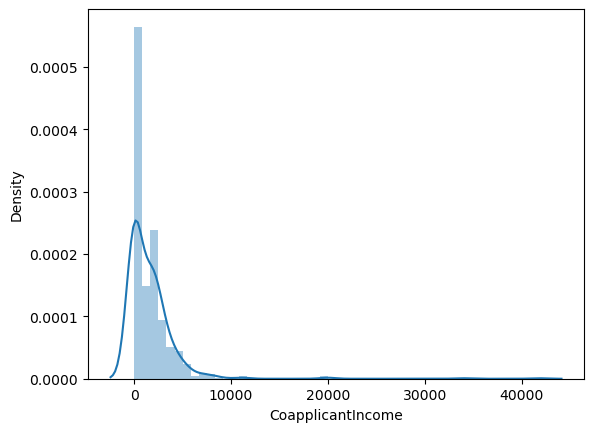

In [16]:
# distrubution of salary of co-applicants
sns.distplot(df['CoapplicantIncome'])

In [17]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [18]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_Income'])

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

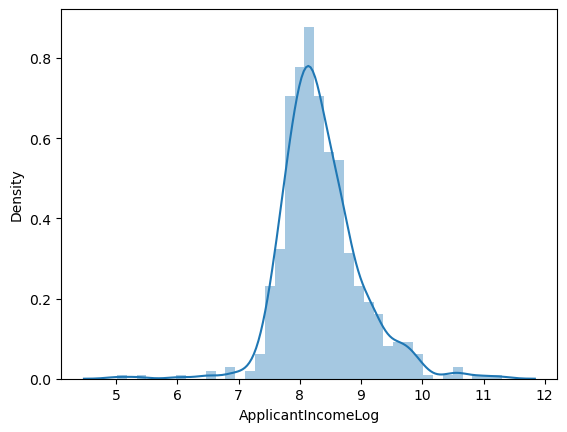

In [19]:
sns.distplot(df['ApplicantIncomeLog'])

Data Preprocessing and Visualization
Get the number of columns of object datatype.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df = df.drop(['Loan_ID'],axis=1)

In [22]:
cols = ['Gender','Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [24]:
#df = df.drop(['Loan_Status'],axis=1)

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)

In [26]:
corr=df.corr()

<Axes: >

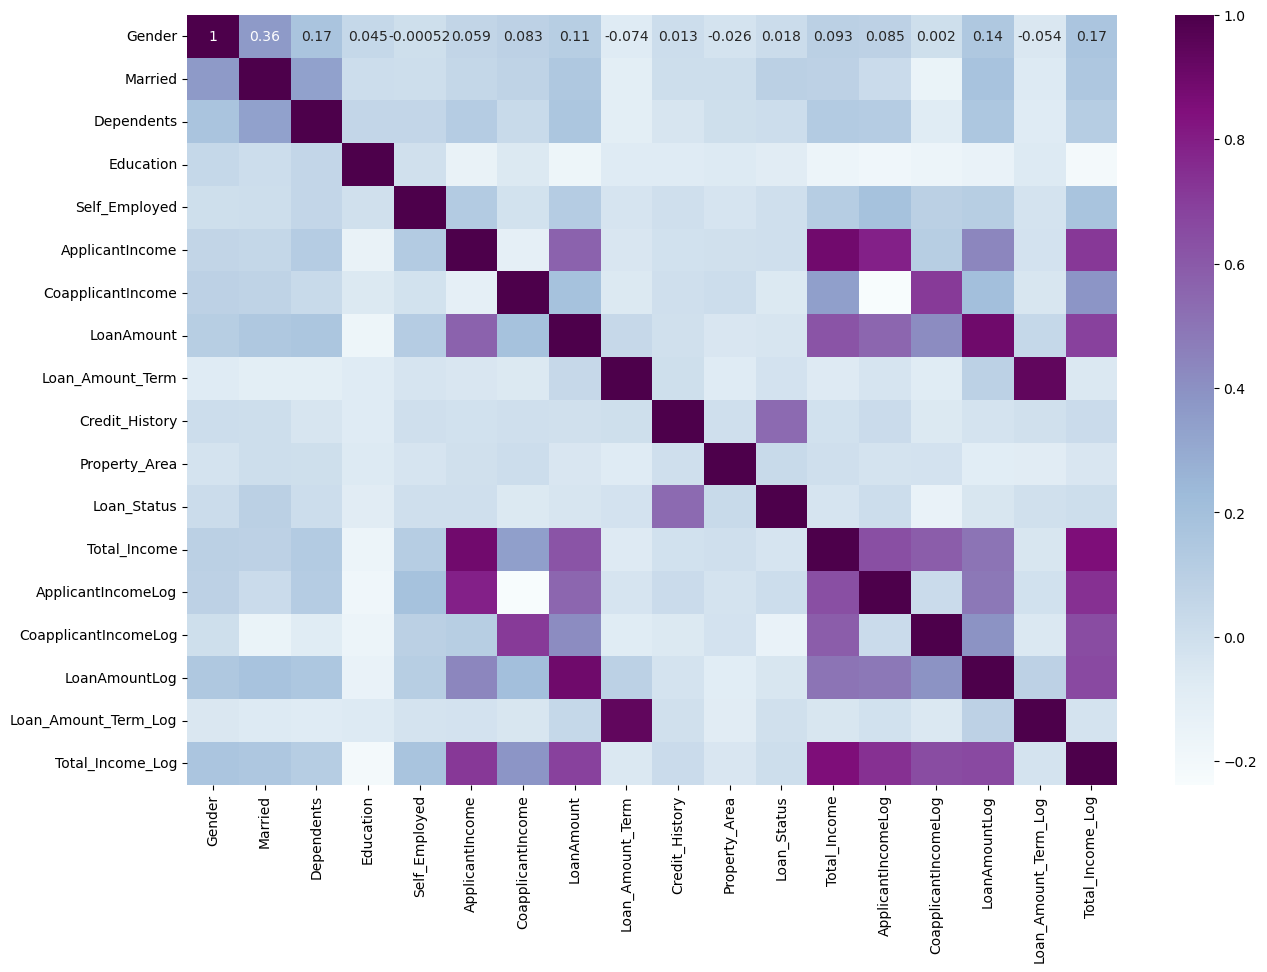

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [28]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'CoapplicantIncomeLog']
df = df.drop(columns=cols,axis=1)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


In [30]:
# specify input and output attribute
X = df.drop(['Loan_Status'],axis=1) #Input
y = df['Loan_Status'] #Output

In [31]:
# select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
df_scores = pd.DataFrame( columns=['Score'])
df_columns = pd.DataFrame(X.columns, columns = ['Feature_name'])
feature_rank = pd.concat([df_scores,df_columns],axis=1)
feature_rank

,Score,Feature_name
0,NaN,Gender
1,NaN,Married
2,NaN,Dependents
3,NaN,Education
4,NaN,Self_Employed
5,NaN,Credit_History
6,NaN,Property_Area
7,NaN,ApplicantIncomeLog
8,NaN,LoanAmountLog
9,NaN,Loan_Amount_Term_Log


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

- Creation of new features (e.g., total income, loan-to-income ratio)
    - Feature scaling and normalization
    - Feature selection techniques (e.g., correlation analysis, feature
    - . Model Selection
    - Selection of appropriate machine learning algorithms for loan prediction (e.g., Logistic Regression, Random Forest, Gradient Boosting)
    - Splitting the dataset into training and testing sets
    - Evaluation metrics selection (e.g., accuracy, precision, recall, F1 score)
 

In [41]:
model.feature_importances_

array([0.02388843, 0.02008123, 0.06096115, 0.02004406, 0.02099555,
       0.29193741, 0.04705683, 0.1509322 , 0.15425978, 0.0526642 ,
       0.15717916])


6. Model Training and Evaluation
    - Training the selected models on the training data
    - Hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV
    - Evaluating model performance on the testing set using selected metrics


In [42]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

In [43]:
from sklearn.feature_selection import mutual_info_classif
mu_ifo = mutual_info_classif(X,y)

In [44]:
mu_data = pd.Series(mu_ifo, index = X.columns)
mu_data.sort_values(ascending=False)

Credit_History          0.147776
Education               0.040975
Property_Area           0.011527
Gender                  0.009016
ApplicantIncomeLog      0.004853
Married                 0.001269
Dependents              0.000000
Self_Employed           0.000000
LoanAmountLog           0.000000
Loan_Amount_Term_Log    0.000000
Total_Income_Log        0.000000
dtype: float64

Model Deployment
    - Saving the trained model for future predictions
    - Developing an API for real-time loan prediction
    - Integration of the model into a web application or financial institution's system
    
Evaluating Your Model:
- For classification: ROC curve, AUC score, confusion matrix, classification report, precision, recall, F1-score.
- For regression: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print('Cross validation Accuaracy: ', np.mean(score)*100)

Experimentation:
- Evaluate if the model meets the defined evaluation metric. Consider collecting more data, trying different models, or improving the current model.

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
classify(clf, X,y)

Accuracy is:  78.86178861788618
Cross validation Accuaracy:  80.9462881514061


In [49]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1)
classify(clf, X,y)

Accuracy is:  78.86178861788618
Cross validation Accuaracy:  80.9462881514061


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
classify(knn,X,y)

Accuracy is:  71.54471544715447
Cross validation Accuaracy:  75.56977209116353


Feature Importance:
- Determine which features contribute most to the model's outcomes.

Experimentation:
- Evaluate if the model meets the defined evaluation metric. Consider collecting more data, trying different models, or improving the current model.


Conclusion
By importing these libraries, we have set up the essential tools required for loan approval prediction. These libraries will enable us to perform data analysis, preprocess the data, build machine learning models, evaluate model performance, visualize the data, and document our work effectively.

With these tools at our disposal, we are ready to proceed with the loan approval prediction project.



